In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(20,20)})

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn import preprocessing
from sklearn.cluster import KMeans, k_means

In [3]:
df1= pd.read_csv('virtualbcluster.csv', error_bad_lines=False, sep=';')
df_italia= pd.read_csv('italia.csv', sep=';')
df_italia = df_italia.rename(columns={'Sigla': 'Prov'})
df1=pd.merge(df1, df_italia, on='Prov')

In [4]:
df1.replace({'Prov': 'NA'}, 'Nap')
df= df1.drop(columns=['ClientInvestmentHorizon','PortfolioHorizon','BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash','Regione','ClientDateStart','Prov','Provincia'])
df['PortfolioRisk'] = df['PortfolioRisk'].astype(float)
df['RiskPropension'] = df['RiskPropension'].astype(float)

In [5]:
df1.head()

,ClientID,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,Prov,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione
0,Client1,0.597553,0.088,2.077.883.137,37.027,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,2015,0,PA,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia
1,Client19,0.429550,0.070,4.388.907.809,30.047,0.809524,0.269939,0,0,101134,54,0.346486,0.124244,0.216927,0.744537,0.573297,0,2016,0,PA,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia
2,Client652,0.431233,0.076,12.710.579,40.671,0.714286,0.574847,0,1,42348,52,0.296850,0.143672,0.161196,0.697336,0.636422,0,2016,0,PA,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia
3,Client671,0.414649,0.029,1.070.728.631,19.513,0.809524,0.362577,0,1,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461,0,2015,0,PA,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia
4,Client762,0.337011,0.090,7.03,29.743,0.809524,0.433129,1,1,93642,69,0.401974,0.228357,0.243846,0.110424,0.737988,0,2015,1,PA,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia


In [6]:
df.head()

,ClientID,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,NoTrustInBanks
0,Client1,0.597553,0.088,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,0
1,Client19,0.429550,0.070,0.809524,0.269939,0,0,101134,54,0.346486,0.124244,0.216927,0.744537,0.573297,0,0
2,Client652,0.431233,0.076,0.714286,0.574847,0,1,42348,52,0.296850,0.143672,0.161196,0.697336,0.636422,0,0
3,Client671,0.414649,0.029,0.809524,0.362577,0,1,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461,0,0
4,Client762,0.337011,0.090,0.809524,0.433129,1,1,93642,69,0.401974,0.228357,0.243846,0.110424,0.737988,0,1


In [7]:
Age_00a35=[]
for i in df.Age:
    if i<35 :
        Age_00a35.append(1)
    else:
        Age_00a35.append(0)
        
Age_35a60=[]
for i in df.Age:
    if i>=35 and i<60 :
        Age_35a60.append(1)
    else:
        Age_35a60.append(0)
        
Age_60a75=[]
for i in df.Age:
    if i>=60 and i<75 :
        Age_60a75.append(1)
    else:
        Age_60a75.append(0)
        
Age_75plus=[]
for i in df.Age:
    if i>=75 :
        Age_75plus.append(1)
    else:
        Age_75plus.append(0)

In [8]:
RP_000a030=[]
for i in df.RiskPropension:
    if i<0.31 :
        RP_000a030.append(1)
    else:
        RP_000a030.append(0)
        
RP_030a055=[]
for i in df.RiskPropension:
    if i>=0.31 and i<0.56 :
        RP_030a055.append(1)
    else:
        RP_030a055.append(0)
        
RP_055a070=[]
for i in df.RiskPropension:
    if i>=0.56 and i<0.71 :
        RP_055a070.append(1)
    else:
        RP_055a070.append(0)
        
RP_070plus=[]
for i in df.RiskPropension:
    if i>0.71 :
        RP_070plus.append(1)
    else:
        RP_070plus.append(0)

In [9]:
PR_000a005=[]
for i in df.PortfolioRisk:
    if i<0.05 :
        PR_000a005.append(1)
    else:
        PR_000a005.append(0)
        
PR_005a008=[]
for i in df.PortfolioRisk:
    if i>=0.05 and i<0.08 :
        PR_005a008.append(1)
    else:
        PR_005a008.append(0)
        
PR_008a020=[]
for i in df.PortfolioRisk:
    if i>=0.08 and i<0.2 :
        PR_008a020.append(1)
    else:
        PR_008a020.append(0)
        
PR_020plus=[]
for i in df.PortfolioRisk:
    if i>=0.2 :
        PR_020plus.append(1)
    else:
        PR_020plus.append(0)

In [10]:
CPI_00a02=[]
for i in df.ClientPotentialIndex:
    if i<0.2 :
        CPI_00a02.append(1)
    else:
        CPI_00a02.append(0)
        
CPI_02a06=[]
for i in df.ClientPotentialIndex:
    if i>=0.2 and i<0.6 :
        CPI_02a06.append(1)
    else:
        CPI_02a06.append(0)
        
CPI_06plus=[]
for i in df.ClientPotentialIndex:
    if i>=0.6 :
        CPI_06plus.append(1)
    else:
        CPI_06plus.append(0)

In [11]:
CKE_000a050=[]
for i in df.ClientKnowledgeExperience :
    if i<0.5 :
        CKE_000a050.append(1)
    else:
        CKE_000a050.append(0)
        
CKE_050a075=[]
for i in df.ClientKnowledgeExperience :
    if i>=0.5 and i<0.75 :
        CKE_050a075.append(1)
    else:
        CKE_050a075.append(0)
        
CKE_075plus=[]
for i in df.ClientKnowledgeExperience :
    if i>=0.75 :
        CKE_075plus.append(1)
    else:
        CKE_075plus.append(0)

In [12]:
AuM_000a035=[]
for i in df.AuM :
    if i<35000 :
        AuM_000a035.append(1)
    else:
        AuM_000a035.append(0)
        
AuM_035a085=[]
for i in df.AuM :
    if i>=35000 and i<85000 :
        AuM_035a085.append(1)
    else:
        AuM_035a085.append(0)
        
AuM_085a200=[]
for i in df.AuM :
    if i>=85000 and i<200000 :
        AuM_085a200.append(1)
    else:
        AuM_085a200.append(0)
        
AuM_200plus=[]
for i in df.AuM :
    if i>=200000 :
        AuM_200plus.append(1)
    else:
        AuM_200plus.append(0)

In [13]:
IN_000a030=[]
for i in df.IncomeNeed :
    if i<0.30 :
        IN_000a030.append(1)
    else:
        IN_000a030.append(0)
        
IN_030a040=[]
for i in df.IncomeNeed :
    if i>=0.30 and i<0.40 :
        IN_030a040.append(1)
    else:
        IN_030a040.append(0)
        
IN_040plus=[]
for i in df.IncomeNeed :
    if i>=0.40 :
        IN_040plus.append(1)
    else:
        IN_040plus.append(0)

In [14]:
LTCN_000a025=[]
for i in df.LongTermCareNeed :
    if i<0.25 :
        LTCN_000a025.append(1)
    else:
        LTCN_000a025.append(0)
        
LTCN_025a050=[]
for i in df.LongTermCareNeed :
    if i>=0.25 and i<0.50 :
        LTCN_025a050.append(1)
    else:
        LTCN_025a050.append(0)
        
LTCN_050a075=[]
for i in df.LongTermCareNeed :
    if i>=0.50 and i<0.75 :
        LTCN_050a075.append(1)
    else:
        LTCN_050a075.append(0)
        
LTCN_075plus=[]
for i in df.LongTermCareNeed :
    if i>=0.75 :
        LTCN_075plus.append(1)
    else:
        LTCN_075plus.append(0)

In [15]:
PN_000a030=[]
for i in df.ProtectionNeed  :
    if i<0.30 :
        PN_000a030.append(1)
    else:
        PN_000a030.append(0)
        
PN_030a065=[]
for i in df.ProtectionNeed  :
    if i>=0.30 and i<0.65 :
        PN_030a065.append(1)
    else:
        PN_030a065.append(0)
        
PN_065plus=[]
for i in df.ProtectionNeed  :
    if i>=0.65 :
        PN_065plus.append(1)
    else:
        PN_065plus.append(0)

In [16]:
PEN_000a040=[]
for i in df.PensionNeed :
    if i<0.40 :
        PEN_000a040.append(1)
    else:
        PEN_000a040.append(0)
        
PEN_040a070=[]
for i in df.PensionNeed :
    if i>=0.40 and i<0.70 :
        PEN_040a070.append(1)
    else:
        PEN_040a070.append(0)
        
PEN_070plus=[]
for i in df.PensionNeed :
    if i>=0.70 :
        PEN_070plus.append(1)
    else:
        PEN_070plus.append(0)

In [17]:
II_000a040=[]
for i in df.InheritanceIndex :
    if i<0.40 :
        II_000a040.append(1)
    else:
        II_000a040.append(0)
        
II_040a065=[]
for i in df.InheritanceIndex :
    if i>=0.40 and i<0.65 :
        II_040a065.append(1)
    else:
        II_040a065.append(0)
        
II_065plus=[]
for i in df.InheritanceIndex :
    if i>=0.65 :
        II_065plus.append(1)
    else:
        II_065plus.append(0)

In [18]:
DF= df[['Sex','NoTrustInBanks','PanicMood']]

In [19]:
Age_00a35= pd.Series(Age_00a35)
DF['Age_00a35']=Age_00a35

Age_35a60= pd.Series(Age_35a60)
DF['Age_35a60']=Age_35a60

Age_60a75= pd.Series(Age_60a75)
DF['Age_60a75']=Age_60a75

Age_75plus= pd.Series(Age_75plus)
DF['Age_75plus']=Age_75plus

RP_000a030= pd.Series(RP_000a030)
DF['RP_000a030']=RP_000a030

RP_030a055= pd.Series(RP_030a055)
DF['RP_030a055']=RP_030a055

RP_055a070= pd.Series(RP_055a070)
DF['RP_055a070']=RP_055a070

RP_070plus= pd.Series(RP_070plus)
DF['RP_070plus']=RP_070plus

PR_000a005= pd.Series(PR_000a005)
DF['PR_000a005']=PR_000a005

PR_005a008= pd.Series(PR_005a008)
DF['PR_005a008']=PR_005a008

PR_008a020= pd.Series(PR_008a020)
DF['PR_008a020']=PR_008a020

PR_020plus= pd.Series(PR_020plus)
DF['PR_020plus']=PR_020plus

CPI_00a02= pd.Series(CPI_00a02)
DF['CPI_00a02']=CPI_00a02

CPI_02a06= pd.Series(CPI_02a06)
DF['CPI_02a06']=CPI_02a06

CPI_06plus= pd.Series(CPI_06plus)
DF['CPI_06plus']=CPI_06plus

CKE_000a050= pd.Series(CKE_000a050)
DF['CKE_000a050']=CKE_000a050

CKE_050a075= pd.Series(CKE_050a075)
DF['CKE_050a075']=CKE_050a075

CKE_075plus= pd.Series(CKE_075plus)
DF['CKE_075plus']=CKE_075plus

AuM_000a035= pd.Series(AuM_000a035)
DF['AuM_000a035']=AuM_000a035

AuM_035a085= pd.Series(AuM_035a085)
DF['AuM_035a085']=AuM_035a085

AuM_085a200= pd.Series(AuM_085a200)
DF['AuM_085a200']=AuM_085a200

AuM_200plus= pd.Series(AuM_200plus)
DF['AuM_200plus']=AuM_200plus

IN_000a030= pd.Series(IN_000a030)
DF['IN_000a030']=IN_000a030

IN_030a040= pd.Series(IN_030a040)
DF['IN_030a040']=IN_030a040

IN_040plus= pd.Series(IN_040plus)
DF['IN_040plus']=IN_040plus

LTCN_000a025= pd.Series(LTCN_000a025)
DF['LTCN_000a025']=LTCN_000a025

LTCN_025a050= pd.Series(LTCN_025a050)
DF['LTCN_025a050']=LTCN_025a050

LTCN_050a075= pd.Series(LTCN_050a075)
DF['LTCN_050a075']=LTCN_050a075

LTCN_075plus= pd.Series(LTCN_075plus)
DF['LTCN_075plus']=LTCN_075plus

PN_000a030= pd.Series(PN_000a030)
DF['PN_000a030']=PN_000a030

PN_030a065= pd.Series(PN_030a065)
DF['PN_030a065']=PN_030a065

PN_065plus= pd.Series(PN_065plus)
DF['PN_065plus']=PN_065plus

PEN_000a040= pd.Series(PEN_000a040)
DF['PEN_000a040']=PEN_000a040

PEN_040a070= pd.Series(PEN_040a070)
DF['PEN_040a070']=PEN_040a070

PEN_070plus= pd.Series(PEN_070plus)
DF['PEN_070plus']=PEN_070plus

II_000a040= pd.Series(II_000a040)
DF['II_000a040']=II_000a040

II_040a065= pd.Series(II_040a065)
DF['II_040a065']=II_040a065

II_065plus= pd.Series(II_065plus)
DF['II_065plus']=II_065plus

<ipython-input-19-9f3f4c07b647>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Age_00a35']=Age_00a35
<ipython-input-19-9f3f4c07b647>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Age_35a60']=Age_35a60
<ipython-input-19-9f3f4c07b647>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [20]:
#DF.set_index('ClientID', inplace=True)
DF=DF.dropna(axis=0)
DF.shape

(4687, 41)

In [21]:
DF.head()

,Sex,NoTrustInBanks,PanicMood,Age_00a35,Age_35a60,Age_60a75,Age_75plus,RP_000a030,RP_030a055,RP_055a070,RP_070plus,PR_000a005,PR_005a008,PR_008a020,PR_020plus,CPI_00a02,CPI_02a06,CPI_06plus,CKE_000a050,CKE_050a075,CKE_075plus,AuM_000a035,AuM_035a085,AuM_085a200,AuM_200plus,IN_000a030,IN_030a040,IN_040plus,LTCN_000a025,LTCN_025a050,LTCN_050a075,LTCN_075plus,PN_000a030,PN_030a065,PN_065plus,PEN_000a040,PEN_040a070,PEN_070plus,II_000a040,II_040a065,II_065plus
0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
4,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1


### Provo a togliere le dummy da DF

In [22]:
DF= DF.drop(columns=['Sex','NoTrustInBanks','PanicMood'])

In [23]:
X_train = DF.values

In [24]:
X_train

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0]], dtype=int64)

In [25]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


clusters=kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,931,687,835,653,1581


In [26]:
clusters

array([0, 4, 4, ..., 4, 4, 0])

In [27]:
predictions

array([0, 4, 4, ..., 4, 4, 0])

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train, clusters)

0.12949390289336538

Explained variance ratio (first two components): [0.17704278 0.10740916]


<Figure size 1440x1440 with 0 Axes>

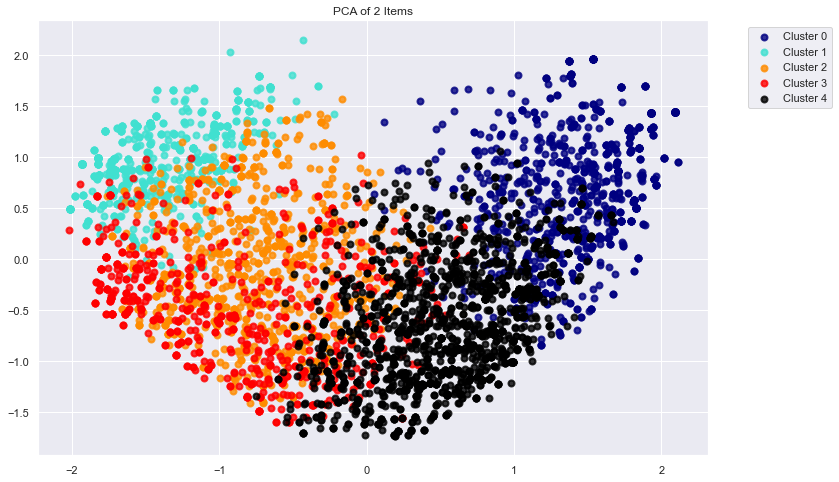

In [29]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions


target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']#'limegreen','hotpink','olive','saddlebrown','darkgrey']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [30]:
X_r

array([[ 1.82558137,  0.50177266],
       [-0.7473509 , -1.34250638],
       [ 0.18832657, -1.5719169 ],
       ...,
       [ 0.39972645, -0.84519033],
       [ 0.48754456, -0.83983451],
       [ 0.84706974,  0.16819151]])

In [31]:
y_num

array([0, 4, 4, ..., 4, 4, 0])

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(X_r, y_num)

0.2323213844109194

In [33]:
pca1 = PCA(n_components=2, random_state = 453)
X_r1 = pca1.fit(X).transform(X)

# Running K means on 5 clusters

kmeans1 = KMeans(n_clusters=5, random_state=2)
kmeans1 = kmeans1.fit(X_r1)


clusters1=kmeans1.labels_

# "predictions" for new data
predictions1 = kmeans1.predict(X_r1)

# calculating the Counts of the cluster
unique1, counts1 = np.unique(predictions1, return_counts=True)
counts1 = counts1.reshape(1,5)

# Creating a datagrame
countscldf1 = pd.DataFrame(counts1, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf1

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,1071,965,1055,847,749


In [34]:
clusters1

array([4, 2, 2, ..., 2, 2, 0])

In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(X_r1, clusters1)

0.3999415992837559

# ////////////////////////////////////////////////////////////////////////////////////////////////////

# Trasformazione categoriche

In [36]:
AGE=[]
for i in df.Age:
    if i<35 :
        AGE.append('Age_00a35')
    elif i>=35 and i<60 :
            AGE.append('Age_35a60')
    elif i>=60 and i<75 :
            AGE.append('Age_60a75')
    elif i>=75 :
            AGE.append('Age_75plus')

In [37]:
RP=[]
for i in df.RiskPropension:
    if i<0.31 :
        RP.append('RP_000a030')
    elif i>=0.31 and i<0.56 :
            RP.append('RP_030a055')
    elif i>=0.56 and i<0.71 :
            RP.append('RP_055a070')
    elif i>0.71 :
            RP.append('RP_070plus')

In [38]:
PR=[]
for i in df.PortfolioRisk:
    if i<0.05 :
        PR.append('PR_000a005')
    elif i>=0.05 and i<0.08 :
            PR.append('PR_005a008')
    elif i>=0.08 and i<0.2 :
            PR.append('PR_008a020')
    elif i>=0.2 :
            PR.append('PR_020plus')

In [39]:
CPI=[]
for i in df.ClientPotentialIndex:
    if i<0.2 :
        CPI.append('CPI_00a02')
    elif i>=0.2 and i<0.6 :
            CPI.append('CPI_02a06')
    elif i>=0.6 :
            CPI.append('CPI_06plus')

In [40]:
CKE=[]
for i in df.ClientKnowledgeExperience:
    if i<0.5 :
        CKE.append('CKE_000a050')
    elif i>=0.5 and i<0.75  :
            CKE.append('CKE_050a075')
    elif i>=0.75 :
            CKE.append('CKE_075plus')

In [41]:
AUM=[]
for i in df.AuM:
    if i<35000 :
        AUM.append('AuM_000a035')
    elif i>=35000 and i<85000 :
            AUM.append('AuM_035a085')
    elif i>=85000 and i<200000 :
            AUM.append('AuM_085a200')
    elif i>=200000 :
            AUM.append('AuM_200plus')

In [42]:
IN=[]
for i in df.IncomeNeed :
    if i<0.30 :
        IN.append('IN_000a030')
    elif i>=0.30 and i<0.40  :
            IN.append('IN_030a040')
    elif i>=0.40 :
            IN.append('IN_040plus')

In [43]:
LTCN=[]
for i in df.LongTermCareNeed:
    if i<0.25 :
        LTCN.append('LTCN_000a025')
    elif i>=0.25 and i<0.50 :
            LTCN.append('LTCN_025a050')
    elif i>=0.50 and i<0.75 :
            LTCN.append('LTCN_050a075')
    elif i>=0.75 :
            LTCN.append('LTCN_075plus')

In [44]:
PN=[]
for i in df.ProtectionNeed :
    if i<0.30 :
        PN.append('PN_000a030')
    elif i>=0.30 and i<0.65  :
            PN.append('PN_030a065')
    elif i>=0.65 :
            PN.append('PN_065plus')

In [45]:
PEN=[]
for i in df.PensionNeed:
    if i<0.40 :
        PEN.append('PEN_000a040')
    elif i>=0.40 and i<0.70 :
            PEN.append('PEN_040a070')
    elif i>=0.70 :
            PEN.append('PEN_070plus')

In [46]:
II=[]
for i in df.InheritanceIndex :
    if i<0.40 :
        II.append('II_000a040')
    elif i>=0.40 and i<0.65 :
            II.append('II_040a065')
    elif i>=0.65 :
            II.append('II_065plus')

In [47]:
DF1= df1[['Sex','IncomeHighLow','NoTrustInBanks','PanicMood']]

In [48]:
AGE= pd.Series(AGE)
DF1['AGE']=AGE

RP= pd.Series(RP)
DF1['RP']=RP

PR= pd.Series(PR)
DF1['PR']=PR

CPI= pd.Series(CPI)
DF1['CPI']=CPI

CKE= pd.Series(CKE)
DF1['CKE']=CKE

AUM= pd.Series(AUM)
DF1['AUM']=AUM

IN= pd.Series(IN)
DF1['IN']=IN

LTCN= pd.Series(LTCN)
DF1['LTCN']=LTCN

PN= pd.Series(PN)
DF1['PN']=PN

PEN= pd.Series(PEN)
DF1['PEN']=PEN

II= pd.Series(II)
DF1['II']=II

<ipython-input-48-004ff14129ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['AGE']=AGE
<ipython-input-48-004ff14129ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['RP']=RP
<ipython-input-48-004ff14129ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [49]:
DF1.head()

,Sex,IncomeHighLow,NoTrustInBanks,PanicMood,AGE,RP,PR,CPI,CKE,AUM,IN,LTCN,PN,PEN,II
0,1,0,0,0,Age_00a35,RP_055a070,PR_008a020,CPI_00a02,CKE_000a050,AuM_000a035,IN_000a030,LTCN_075plus,PN_000a030,PEN_040a070,II_000a040
1,0,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_075plus,AuM_085a200,IN_030a040,LTCN_000a025,PN_000a030,PEN_070plus,II_040a065
2,1,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_050a075,AuM_035a085,IN_000a030,LTCN_000a025,PN_000a030,PEN_040a070,II_040a065
3,1,0,0,0,Age_35a60,RP_030a055,PR_000a005,CPI_02a06,CKE_075plus,AuM_200plus,IN_040plus,LTCN_050a075,PN_000a030,PEN_040a070,II_040a065
4,1,1,1,0,Age_60a75,RP_030a055,PR_008a020,CPI_02a06,CKE_075plus,AuM_085a200,IN_040plus,LTCN_000a025,PN_000a030,PEN_000a040,II_065plus


In [50]:
BondInvestments=pd.Series(df1.BondInvestments)
EquityInvestments=pd.Series(df1.EquityInvestments)
MoneyMarketInvestments= pd.Series(df1.MoneyMarketInvestments)
OtherInvestments= pd.Series(df1.OtherInvestments)
Cash=pd.Series(df1.Cash)
Provincia=pd.Series(df1.Provincia)
Regione= pd.Series(df1.Regione)

DF1['BondInvestments']= BondInvestments
DF1['EquityInvestments']= EquityInvestments
DF1['MoneyMarketInvestments']= MoneyMarketInvestments
DF1['OtherInvestments']= OtherInvestments
DF1['Cash']= Cash
DF1['Provincia']= Provincia
DF1['Regione']= Regione

<ipython-input-50-b512bd384002>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['BondInvestments']= BondInvestments
<ipython-input-50-b512bd384002>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['EquityInvestments']= EquityInvestments
<ipython-input-50-b512bd384002>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [51]:
DF1.head()

,Sex,IncomeHighLow,NoTrustInBanks,PanicMood,AGE,RP,PR,CPI,CKE,AUM,IN,LTCN,PN,PEN,II,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione
0,1,0,0,0,Age_00a35,RP_055a070,PR_008a020,CPI_00a02,CKE_000a050,AuM_000a035,IN_000a030,LTCN_075plus,PN_000a030,PEN_040a070,II_000a040,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia
1,0,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_075plus,AuM_085a200,IN_030a040,LTCN_000a025,PN_000a030,PEN_070plus,II_040a065,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia
2,1,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_050a075,AuM_035a085,IN_000a030,LTCN_000a025,PN_000a030,PEN_040a070,II_040a065,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia
3,1,0,0,0,Age_35a60,RP_030a055,PR_000a005,CPI_02a06,CKE_075plus,AuM_200plus,IN_040plus,LTCN_050a075,PN_000a030,PEN_040a070,II_040a065,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia
4,1,1,1,0,Age_60a75,RP_030a055,PR_008a020,CPI_02a06,CKE_075plus,AuM_085a200,IN_040plus,LTCN_000a025,PN_000a030,PEN_000a040,II_065plus,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia


## Dataset con categoriche

In [52]:
clusters1

array([4, 2, 2, ..., 2, 2, 0])

In [53]:
df1.head()

,ClientID,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,Prov,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione
0,Client1,0.597553,0.088,2.077.883.137,37.027,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,2015,0,PA,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia
1,Client19,0.429550,0.070,4.388.907.809,30.047,0.809524,0.269939,0,0,101134,54,0.346486,0.124244,0.216927,0.744537,0.573297,0,2016,0,PA,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia
2,Client652,0.431233,0.076,12.710.579,40.671,0.714286,0.574847,0,1,42348,52,0.296850,0.143672,0.161196,0.697336,0.636422,0,2016,0,PA,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia
3,Client671,0.414649,0.029,1.070.728.631,19.513,0.809524,0.362577,0,1,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461,0,2015,0,PA,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia
4,Client762,0.337011,0.090,7.03,29.743,0.809524,0.433129,1,1,93642,69,0.401974,0.228357,0.243846,0.110424,0.737988,0,2015,1,PA,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia


In [54]:
# Attachine the clusters back to our initial Dataset that has all the data
DF1['Clusters'] = clusters1

<ipython-input-54-b71cce371ba4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Clusters'] = clusters1


In [55]:
Clusters_Category=[]
for i in DF1.Clusters:
    if i==0:
        Clusters_Category.append('Cluster 1')
    elif i==1:
        Clusters_Category.append('Cluster 2')
    elif i==2:
        Clusters_Category.append('Cluster 3')
    elif i==3:
        Clusters_Category.append('Cluster 4')
    elif i==4:
        Clusters_Category.append('Cluster 5')       

In [56]:
#Clusters_Category

In [57]:
Clusters_Category= pd.Series(Clusters_Category)
DF1['Clusters_Category']=Clusters_Category

<ipython-input-57-4bce4a3ce72d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Clusters_Category']=Clusters_Category


In [58]:
BondInvestments=pd.Series(df1.BondInvestments)
EquityInvestments=pd.Series(df1.EquityInvestments)
MoneyMarketInvestments= pd.Series(df1.MoneyMarketInvestments)
OtherInvestments= pd.Series(df1.OtherInvestments)
Cash=pd.Series(df1.Cash)
Provincia=pd.Series(df1.Provincia)
Regione= pd.Series(df1.Regione)

DF1['BondInvestments']= BondInvestments
DF1['EquityInvestments']= EquityInvestments
DF1['MoneyMarketInvestments']= MoneyMarketInvestments
DF1['OtherInvestments']= OtherInvestments
DF1['Cash']= Cash
DF1['Provincia']= Provincia
DF1['Regione']= Regione

<ipython-input-58-b512bd384002>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['BondInvestments']= BondInvestments
<ipython-input-58-b512bd384002>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['EquityInvestments']= EquityInvestments
<ipython-input-58-b512bd384002>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [59]:
DF1.head()

,Sex,IncomeHighLow,NoTrustInBanks,PanicMood,AGE,RP,PR,CPI,CKE,AUM,IN,LTCN,PN,PEN,II,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,Clusters,Clusters_Category
0,1,0,0,0,Age_00a35,RP_055a070,PR_008a020,CPI_00a02,CKE_000a050,AuM_000a035,IN_000a030,LTCN_075plus,PN_000a030,PEN_040a070,II_000a040,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia,4,Cluster 5
1,0,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_075plus,AuM_085a200,IN_030a040,LTCN_000a025,PN_000a030,PEN_070plus,II_040a065,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia,2,Cluster 3
2,1,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_050a075,AuM_035a085,IN_000a030,LTCN_000a025,PN_000a030,PEN_040a070,II_040a065,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia,2,Cluster 3
3,1,0,0,0,Age_35a60,RP_030a055,PR_000a005,CPI_02a06,CKE_075plus,AuM_200plus,IN_040plus,LTCN_050a075,PN_000a030,PEN_040a070,II_040a065,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia,2,Cluster 3
4,1,1,1,0,Age_60a75,RP_030a055,PR_008a020,CPI_02a06,CKE_075plus,AuM_085a200,IN_040plus,LTCN_000a025,PN_000a030,PEN_000a040,II_065plus,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia,3,Cluster 4


In [60]:
# rendo categoriche anche le var investimenti:

BI_0a35=[]
for i in df1.BondInvestments:
    if i<0.35 :
        BI_0a35.append(1)
    else:
        BI_0a35.append(0)
        
BI_35a70=[]
for i in df1.BondInvestments:
    if i>=0.35 and i<0.70 :
        BI_35a70.append(1)
    else:
        BI_35a70.append(0)
        
BI_70plus=[]
for i in df1.BondInvestments:
    if i>=0.70 :
        BI_70plus.append(1)
    else:
        BI_70plus.append(0)
        
EI_0a20=[]
for i in df1.EquityInvestments:
    if i<0.20 :
        EI_0a20.append(1)
    else:
        EI_0a20.append(0)
        
EI_20a40=[]
for i in df1.EquityInvestments:
    if i>=0.20 and i<0.40 :
        EI_20a40.append(1)
    else:
        EI_20a40.append(0)
        
EI_40plus=[]
for i in df1.EquityInvestments:
    if i>=0.40 :
        EI_40plus.append(1)
    else:
        EI_40plus.append(0)
        
MMI_0a5=[]
for i in df1.MoneyMarketInvestments:
    if i<0.05 :
        MMI_0a5.append(1)
    else:
        MMI_0a5.append(0)
        
MMI_5a25=[]
for i in df1.MoneyMarketInvestments:
    if i>=0.05 and i<0.25 :
        MMI_5a25.append(1)
    else:
        MMI_5a25.append(0)
        
MMI_25plus=[]
for i in df1.MoneyMarketInvestments:
    if i>=0.25 :
        MMI_25plus.append(1)
    else:
        MMI_25plus.append(0)
        
OI_0=[]
for i in df1.OtherInvestments:
    if i==0 :
        OI_0.append(1)
    else:
        OI_0.append(0)
        
OI_0a20=[]
for i in df1.OtherInvestments:
    if i>=0 and i<0.20 :
        OI_0a20.append(1)
    else:
        OI_0a20.append(0)
        
OI_20plus=[]
for i in df1.OtherInvestments:
    if i>=0.20 :
        OI_20plus.append(1)
    else:
        OI_20plus.append(0)
        
C_0a3=[]
for i in df1.OtherInvestments:
    if i<0.03 :
        C_0a3.append(1)
    else:
        C_0a3.append(0)
        
C_3a35=[]
for i in df1.OtherInvestments:
    if i>=0.03 and i<0.35 :
        C_3a35.append(1)
    else:
        C_3a35.append(0)
        
C_35plus=[]
for i in df1.OtherInvestments:
    if i>=0.35 :
        C_35plus.append(1)
    else:
        C_35plus.append(0)

In [61]:
BI=[]
for i in DF1.BondInvestments :
    if i<0.35 :
        BI.append('BI_000a035')
    elif i>=0.35 and i<0.7 :
            BI.append('BI_035a070')
    elif i>=0.7 :
            BI.append('BI_070plus')
DF1['BI'] = pd.Series(BI)
            
EI=[]
for i in DF1.EquityInvestments :
    if i<0.2 :
        EI.append('EI_000a020')
    elif i>=0.2 and i<0.4 :
            EI.append('EI_020a040')
    elif i>=0.4 :
            EI.append('EI_040plus')
DF1['EI'] = pd.Series(EI)

MMI=[]
for i in DF1.MoneyMarketInvestments :
    if i<0.05 :
        MMI.append('MMI_000a005')
    elif i>=0.05 and i<0.25 :
            MMI.append('MMI_005a025')
    elif i>=0.25 :
            MMI.append('MMI_025plus')
DF1['MMI'] = pd.Series(MMI)

OI=[]
for i in DF1.OtherInvestments :
    if i==0 :
        OI.append('OI_000')
    elif i>=0 and i<0.2 :
            OI.append('OI_000a020')
    elif i>=0.2 :
            OI.append('OI_020plus')
DF1['OI'] = pd.Series(OI)

C=[]
for i in DF1.Cash :
    if i<0.03 :
        C.append('C_000a003')
    elif i>=0.03 and i<0.35 :
            C.append('C_003a035')
    elif i>=0.35 :
            C.append('C_035plus')
DF1['C'] = pd.Series(C)

<ipython-input-61-517d56a42d53>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['BI'] = pd.Series(BI)
<ipython-input-61-517d56a42d53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['EI'] = pd.Series(EI)


In [62]:
DF1.head()

,Sex,IncomeHighLow,NoTrustInBanks,PanicMood,AGE,RP,PR,CPI,CKE,AUM,IN,LTCN,PN,PEN,II,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,Clusters,Clusters_Category,BI,EI,MMI,OI,C
0,1,0,0,0,Age_00a35,RP_055a070,PR_008a020,CPI_00a02,CKE_000a050,AuM_000a035,IN_000a030,LTCN_075plus,PN_000a030,PEN_040a070,II_000a040,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia,4,Cluster 5,BI_035a070,EI_040plus,MMI_000a005,OI_000,C_000a003
1,0,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_075plus,AuM_085a200,IN_030a040,LTCN_000a025,PN_000a030,PEN_070plus,II_040a065,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia,2,Cluster 3,BI_035a070,EI_020a040,MMI_000a005,OI_000,C_003a035
2,1,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_050a075,AuM_035a085,IN_000a030,LTCN_000a025,PN_000a030,PEN_040a070,II_040a065,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia,2,Cluster 3,BI_035a070,EI_040plus,MMI_000a005,OI_000,C_000a003
3,1,0,0,0,Age_35a60,RP_030a055,PR_000a005,CPI_02a06,CKE_075plus,AuM_200plus,IN_040plus,LTCN_050a075,PN_000a030,PEN_040a070,II_040a065,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia,2,Cluster 3,BI_035a070,EI_000a020,MMI_005a025,OI_000a020,C_000a003
4,1,1,1,0,Age_60a75,RP_030a055,PR_008a020,CPI_02a06,CKE_075plus,AuM_085a200,IN_040plus,LTCN_000a025,PN_000a030,PEN_000a040,II_065plus,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia,3,Cluster 4,BI_035a070,EI_020a040,MMI_000a005,OI_000,C_003a035


In [64]:
# DF1.to_csv(r'/Users/Giacomo/Desktop/DS_LAB/DF1.csv')
DF2 = DF1.iloc[:, 4:15]
DF2[['BI', 'EI', 'MMI', 'OI', 'C']] = DF1[['BI', 'EI', 'MMI', 'OI', 'C']]
DF2['Clusters_Category'] = DF1['Clusters_Category']
DF2.head()

,AGE,RP,PR,CPI,CKE,AUM,IN,LTCN,PN,PEN,II,BI,EI,MMI,OI,C,Clusters_Category
0,Age_00a35,RP_055a070,PR_008a020,CPI_00a02,CKE_000a050,AuM_000a035,IN_000a030,LTCN_075plus,PN_000a030,PEN_040a070,II_000a040,BI_035a070,EI_040plus,MMI_000a005,OI_000,C_000a003,Cluster 5
1,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_075plus,AuM_085a200,IN_030a040,LTCN_000a025,PN_000a030,PEN_070plus,II_040a065,BI_035a070,EI_020a040,MMI_000a005,OI_000,C_003a035,Cluster 3
2,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_050a075,AuM_035a085,IN_000a030,LTCN_000a025,PN_000a030,PEN_040a070,II_040a065,BI_035a070,EI_040plus,MMI_000a005,OI_000,C_000a003,Cluster 3
3,Age_35a60,RP_030a055,PR_000a005,CPI_02a06,CKE_075plus,AuM_200plus,IN_040plus,LTCN_050a075,PN_000a030,PEN_040a070,II_040a065,BI_035a070,EI_000a020,MMI_005a025,OI_000a020,C_000a003,Cluster 3
4,Age_60a75,RP_030a055,PR_008a020,CPI_02a06,CKE_075plus,AuM_085a200,IN_040plus,LTCN_000a025,PN_000a030,PEN_000a040,II_065plus,BI_035a070,EI_020a040,MMI_000a005,OI_000,C_003a035,Cluster 4


In [65]:
DF2.to_csv('df-inv.csv')

# Aggiungo investimenti nel cluster

In [61]:
df1.head()

,ClientID,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,Prov,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione
0,Client1,0.597553,0.088,2.077.883.137,37.027,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,2015,0,PA,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia
1,Client19,0.429550,0.070,4.388.907.809,30.047,0.809524,0.269939,0,0,101134,54,0.346486,0.124244,0.216927,0.744537,0.573297,0,2016,0,PA,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia
2,Client652,0.431233,0.076,12.710.579,40.671,0.714286,0.574847,0,1,42348,52,0.296850,0.143672,0.161196,0.697336,0.636422,0,2016,0,PA,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia
3,Client671,0.414649,0.029,1.070.728.631,19.513,0.809524,0.362577,0,1,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461,0,2015,0,PA,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia
4,Client762,0.337011,0.090,7.03,29.743,0.809524,0.433129,1,1,93642,69,0.401974,0.228357,0.243846,0.110424,0.737988,0,2015,1,PA,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia


In [62]:
df1.dtypes

ClientID                      object
RiskPropension               float64
PortfolioRisk                float64
ClientInvestmentHorizon       object
PortfolioHorizon              object
ClientKnowledgeExperience    float64
ClientPotentialIndex         float64
IncomeHighLow                  int64
Sex                            int64
AuM                            int64
Age                            int64
IncomeNeed                   float64
LongTermCareNeed             float64
ProtectionNeed               float64
PensionNeed                  float64
InheritanceIndex             float64
PanicMood                      int64
ClientDateStart                int64
NoTrustInBanks                 int64
Prov                          object
BondInvestments              float64
EquityInvestments            float64
MoneyMarketInvestments       float64
OtherInvestments             float64
Cash                         float64
Provincia                     object
Regione                       object
d

In [63]:
DF.head()

,Age_00a35,Age_35a60,Age_60a75,Age_75plus,RP_000a030,RP_030a055,RP_055a070,RP_070plus,PR_000a005,PR_005a008,PR_008a020,PR_020plus,CPI_00a02,CPI_02a06,CPI_06plus,CKE_000a050,CKE_050a075,CKE_075plus,AuM_000a035,AuM_035a085,AuM_085a200,AuM_200plus,IN_000a030,IN_030a040,IN_040plus,LTCN_000a025,LTCN_025a050,LTCN_050a075,LTCN_075plus,PN_000a030,PN_030a065,PN_065plus,PEN_000a040,PEN_040a070,PEN_070plus,II_000a040,II_040a065,II_065plus
0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1


In [64]:
df1.BondInvestments.describe()

count    4687.000000
mean        0.501570
std         0.270097
min         0.000000
25%         0.335200
50%         0.534700
75%         0.692650
max         1.000000
Name: BondInvestments, dtype: float64

In [65]:
df1.EquityInvestments.describe()

count    4687.000000
mean        0.232611
std         0.197904
min         0.000000
25%         0.071100
50%         0.201600
75%         0.350400
max         1.000000
Name: EquityInvestments, dtype: float64

In [66]:
df1.MoneyMarketInvestments.describe()

count    4687.000000
mean        0.048139
std         0.094687
min         0.000000
25%         0.000000
50%         0.023900
75%         0.058300
max         1.000000
Name: MoneyMarketInvestments, dtype: float64

In [67]:
df1.OtherInvestments.describe()

count    4687.000000
mean        0.041876
std         0.088695
min         0.000000
25%         0.000000
50%         0.000000
75%         0.048400
max         1.000000
Name: OtherInvestments, dtype: float64

In [68]:
df1.Cash.describe()

count    4687.000000
mean        0.168219
std         0.295954
min         0.000000
25%         0.001500
50%         0.025900
75%         0.151100
max         1.000000
Name: Cash, dtype: float64

In [69]:
BI_0a35=[]
for i in df1.BondInvestments:
    if i<0.35 :
        BI_0a35.append(1)
    else:
        BI_0a35.append(0)
        
BI_35a70=[]
for i in df1.BondInvestments:
    if i>=0.35 and i<0.70 :
        BI_35a70.append(1)
    else:
        BI_35a70.append(0)
        
BI_70plus=[]
for i in df1.BondInvestments:
    if i>=0.70 :
        BI_70plus.append(1)
    else:
        BI_70plus.append(0)

In [70]:
EI_0a20=[]
for i in df1.EquityInvestments:
    if i<0.20 :
        EI_0a20.append(1)
    else:
        EI_0a20.append(0)
        
EI_20a40=[]
for i in df1.EquityInvestments:
    if i>=0.20 and i<0.40 :
        EI_20a40.append(1)
    else:
        EI_20a40.append(0)
        
EI_40plus=[]
for i in df1.EquityInvestments:
    if i>=0.40 :
        EI_40plus.append(1)
    else:
        EI_40plus.append(0)

In [71]:
MMI_0a5=[]
for i in df1.MoneyMarketInvestments:
    if i<0.05 :
        MMI_0a5.append(1)
    else:
        MMI_0a5.append(0)
        
MMI_5a25=[]
for i in df1.MoneyMarketInvestments:
    if i>=0.05 and i<0.25 :
        MMI_5a25.append(1)
    else:
        MMI_5a25.append(0)
        
MMI_25plus=[]
for i in df1.MoneyMarketInvestments:
    if i>=0.25 :
        MMI_25plus.append(1)
    else:
        MMI_25plus.append(0)

In [72]:
OI_0=[]
for i in df1.OtherInvestments:
    if i==0 :
        OI_0.append(1)
    else:
        OI_0.append(0)
        
OI_0a20=[]
for i in df1.OtherInvestments:
    if i>=0 and i<0.20 :
        OI_0a20.append(1)
    else:
        OI_0a20.append(0)
        
OI_20plus=[]
for i in df1.OtherInvestments:
    if i>=0.20 :
        OI_20plus.append(1)
    else:
        OI_20plus.append(0)

In [73]:
C_0a3=[]
for i in df1.OtherInvestments:
    if i<0.03 :
        C_0a3.append(1)
    else:
        C_0a3.append(0)
        
C_3a35=[]
for i in df1.OtherInvestments:
    if i>=0.03 and i<0.35 :
        C_3a35.append(1)
    else:
        C_3a35.append(0)
        
C_35plus=[]
for i in df1.OtherInvestments:
    if i>=0.35 :
        C_35plus.append(1)
    else:
        C_35plus.append(0)

In [74]:
DF2= DF

In [75]:
BI_0a35= pd.Series(BI_0a35)
DF2['BI_0a35']=BI_0a35

BI_35a70= pd.Series(BI_35a70)
DF2['BI_35a70']=BI_35a70

BI_70plus= pd.Series(BI_70plus)
DF2['BI_70plus']=BI_70plus

EI_0a20= pd.Series(EI_0a20)
DF2['EI_0a20']=EI_0a20

EI_20a40= pd.Series(EI_20a40)
DF2['EI_20a40']=EI_20a40

EI_20a40= pd.Series(EI_20a40)
DF2['EI_20a40']=EI_20a40

EI_40plus= pd.Series(EI_40plus)
DF2['EI_40plus']=EI_40plus

MMI_0a5= pd.Series(MMI_0a5)
DF2['MMI_0a5']=MMI_0a5

MMI_5a25= pd.Series(MMI_5a25)
DF2['MMI_5a25']=MMI_5a25

MMI_25plus= pd.Series(MMI_25plus)
DF2['MMI_25plus']=MMI_25plus

OI_0= pd.Series(OI_0)
DF2['OI_0']=OI_0

OI_0a20= pd.Series(OI_0a20)
DF2['OI_0a20']=OI_0a20

OI_20plus= pd.Series(OI_20plus)
DF2['OI_20plus']=OI_20plus

C_0a3= pd.Series(C_0a3)
DF2['C_0a3']=C_0a3

C_3a35= pd.Series(C_3a35)
DF2['C_3a35']=C_3a35

C_35plus= pd.Series(C_35plus)
DF2['C_35plus']=C_35plus

In [76]:
DF2=DF2.dropna(axis=0)
DF2.shape

(4687, 53)

In [77]:
DF2.columns

Index(['Age_00a35', 'Age_35a60', 'Age_60a75', 'Age_75plus', 'RP_000a030',
       'RP_030a055', 'RP_055a070', 'RP_070plus', 'PR_000a005', 'PR_005a008',
       'PR_008a020', 'PR_020plus', 'CPI_00a02', 'CPI_02a06', 'CPI_06plus',
       'CKE_000a050', 'CKE_050a075', 'CKE_075plus', 'AuM_000a035',
       'AuM_035a085', 'AuM_085a200', 'AuM_200plus', 'IN_000a030', 'IN_030a040',
       'IN_040plus', 'LTCN_000a025', 'LTCN_025a050', 'LTCN_050a075',
       'LTCN_075plus', 'PN_000a030', 'PN_030a065', 'PN_065plus', 'PEN_000a040',
       'PEN_040a070', 'PEN_070plus', 'II_000a040', 'II_040a065', 'II_065plus',
       'BI_0a35', 'BI_35a70', 'BI_70plus', 'EI_0a20', 'EI_20a40', 'EI_40plus',
       'MMI_0a5', 'MMI_5a25', 'MMI_25plus', 'OI_0', 'OI_0a20', 'OI_20plus',
       'C_0a3', 'C_3a35', 'C_35plus'],
      dtype='object')

In [161]:
DF2.head()

,Age_00a35,Age_35a60,Age_60a75,Age_75plus,RP_000a030,RP_030a055,RP_055a070,RP_070plus,PR_000a005,PR_005a008,PR_008a020,PR_020plus,CPI_00a02,CPI_02a06,CPI_06plus,CKE_000a050,CKE_050a075,CKE_075plus,AuM_000a035,AuM_035a085,AuM_085a200,AuM_200plus,IN_000a030,IN_030a040,IN_040plus,LTCN_000a025,LTCN_025a050,LTCN_050a075,LTCN_075plus,PN_000a030,PN_030a065,PN_065plus,PEN_000a040,PEN_040a070,PEN_070plus,II_000a040,II_040a065,II_065plus,BI_0a35,BI_35a70,BI_70plus,EI_0a20,EI_20a40,EI_40plus,MMI_0a5,MMI_5a25,MMI_25plus,OI_0,OI_0a20,OI_20plus,C_0a3,C_3a35,C_35plus
0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [79]:
X_inv = DF2.values

In [80]:
# Running K means on 5 clusters

kmeansINV = KMeans(n_clusters=5, random_state=2)
kmeansINV = kmeansINV.fit(X_inv)


clustersINV=kmeansINV.labels_

# "predictions" for new data
predictionsINV = kmeansINV.predict(X_inv)

# calculating the Counts of the cluster
uniqueINV, countsINV = np.unique(predictionsINV, return_counts=True)
countsINV = countsINV.reshape(1,5)

# Creating a datagrame
countscldfINV = pd.DataFrame(countsINV, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldfINV

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,857,902,802,1211,915


Explained variance ratio (first two components): [0.14485666 0.10212356]


<Figure size 1440x1440 with 0 Axes>

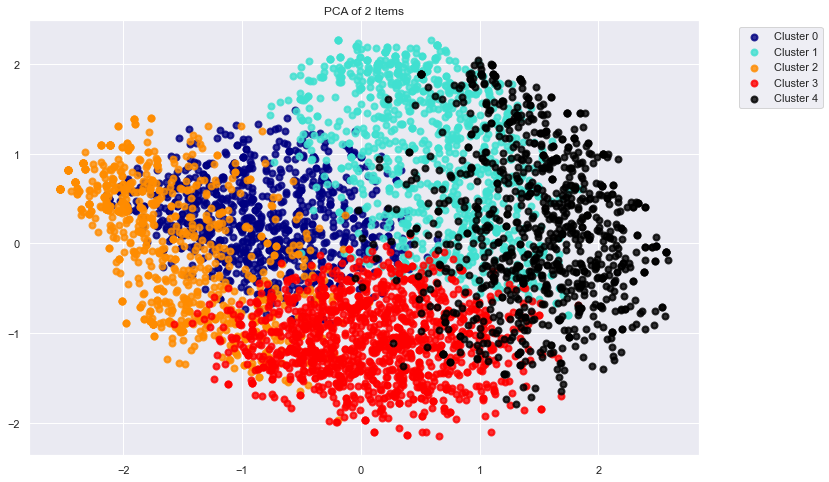

In [81]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_inv
y_num = predictionsINV


target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca_inv = PCA(n_components=2, random_state = 453)
X_r_inv = pca_inv.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca_inv.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']#'limegreen','hotpink','olive','saddlebrown','darkgrey']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r_inv[y_num == i, 0], X_r_inv[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [82]:
pca10 = PCA(n_components=2, random_state = 453)
X_r10 = pca1.fit(X_inv).transform(X_inv)

# Running K means on 5 clusters

kmeans10 = KMeans(n_clusters=5, random_state=2)
kmeans10 = kmeans10.fit(X_r10)


clusters10=kmeans10.labels_

# "predictions" for new data
predictions10 = kmeans10.predict(X_r10)

# calculating the Counts of the cluster
unique10, counts10 = np.unique(predictions10, return_counts=True)
counts10 = counts10.reshape(1,5)

# Creating a datagrame
countscldf10 = pd.DataFrame(counts10, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf10

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,874,905,908,1090,910


In [83]:
from sklearn.metrics import silhouette_score
silhouette_score(X_r10, clusters10)

0.37460269226975773

In [84]:
DF1.head()

,Sex,IncomeHighLow,NoTrustInBanks,PanicMood,AGE,RP,PR,CPI,CKE,AUM,IN,LTCN,PN,PEN,II,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,Clusters,Clusters_Category
0,1,0,0,0,Age_00a35,RP_055a070,PR_008a020,CPI_00a02,CKE_000a050,AuM_000a035,IN_000a030,LTCN_075plus,PN_000a030,PEN_040a070,II_000a040,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia,4,Cluster 5
1,0,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_075plus,AuM_085a200,IN_030a040,LTCN_000a025,PN_000a030,PEN_070plus,II_040a065,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia,2,Cluster 3
2,1,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_050a075,AuM_035a085,IN_000a030,LTCN_000a025,PN_000a030,PEN_040a070,II_040a065,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia,2,Cluster 3
3,1,0,0,0,Age_35a60,RP_030a055,PR_000a005,CPI_02a06,CKE_075plus,AuM_200plus,IN_040plus,LTCN_050a075,PN_000a030,PEN_040a070,II_040a065,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia,2,Cluster 3
4,1,1,1,0,Age_60a75,RP_030a055,PR_008a020,CPI_02a06,CKE_075plus,AuM_085a200,IN_040plus,LTCN_000a025,PN_000a030,PEN_000a040,II_065plus,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia,3,Cluster 4


In [85]:
DF1['Clusters_Inv'] = clusters10

<ipython-input-85-e51c7762176c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Clusters_Inv'] = clusters10


In [86]:
Clusters_Category_Inv=[]
for i in DF1.Clusters_Inv:
    if i==0:
        Clusters_Category_Inv.append('Cluster 1')
    elif i==1:
        Clusters_Category_Inv.append('Cluster 2')
    elif i==2:
        Clusters_Category_Inv.append('Cluster 3')
    elif i==3:
        Clusters_Category_Inv.append('Cluster 4')
    elif i==4:
        Clusters_Category_Inv.append('Cluster 5') 

In [87]:
Clusters_Category_Inv= pd.Series(Clusters_Category_Inv)
DF1['Clusters_Category_Inv']=Clusters_Category_Inv

<ipython-input-87-4c00b54be85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF1['Clusters_Category_Inv']=Clusters_Category_Inv


In [88]:
pd.options.display.max_columns = None

In [89]:
DF1.head()

,Sex,IncomeHighLow,NoTrustInBanks,PanicMood,AGE,RP,PR,CPI,CKE,AUM,IN,LTCN,PN,PEN,II,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,Clusters,Clusters_Category,Clusters_Inv,Clusters_Category_Inv
0,1,0,0,0,Age_00a35,RP_055a070,PR_008a020,CPI_00a02,CKE_000a050,AuM_000a035,IN_000a030,LTCN_075plus,PN_000a030,PEN_040a070,II_000a040,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia,4,Cluster 5,3,Cluster 4
1,0,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_075plus,AuM_085a200,IN_030a040,LTCN_000a025,PN_000a030,PEN_070plus,II_040a065,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia,2,Cluster 3,2,Cluster 3
2,1,0,0,0,Age_35a60,RP_030a055,PR_005a008,CPI_02a06,CKE_050a075,AuM_035a085,IN_000a030,LTCN_000a025,PN_000a030,PEN_040a070,II_040a065,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia,2,Cluster 3,2,Cluster 3
3,1,0,0,0,Age_35a60,RP_030a055,PR_000a005,CPI_02a06,CKE_075plus,AuM_200plus,IN_040plus,LTCN_050a075,PN_000a030,PEN_040a070,II_040a065,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia,2,Cluster 3,2,Cluster 3
4,1,1,1,0,Age_60a75,RP_030a055,PR_008a020,CPI_02a06,CKE_075plus,AuM_085a200,IN_040plus,LTCN_000a025,PN_000a030,PEN_000a040,II_065plus,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia,3,Cluster 4,4,Cluster 5


In [90]:
DF2.head()

,Age_00a35,Age_35a60,Age_60a75,Age_75plus,RP_000a030,RP_030a055,RP_055a070,RP_070plus,PR_000a005,PR_005a008,PR_008a020,PR_020plus,CPI_00a02,CPI_02a06,CPI_06plus,CKE_000a050,CKE_050a075,CKE_075plus,AuM_000a035,AuM_035a085,AuM_085a200,AuM_200plus,IN_000a030,IN_030a040,IN_040plus,LTCN_000a025,LTCN_025a050,LTCN_050a075,LTCN_075plus,PN_000a030,PN_030a065,PN_065plus,PEN_000a040,PEN_040a070,PEN_070plus,II_000a040,II_040a065,II_065plus,BI_0a35,BI_35a70,BI_70plus,EI_0a20,EI_20a40,EI_40plus,MMI_0a5,MMI_5a25,MMI_25plus,OI_0,OI_0a20,OI_20plus,C_0a3,C_3a35,C_35plus
0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [91]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersINV = range(2,20) #[2,3,4,5,6,7,8,9]
silhouetteINV = []


for f in no_of_clustersINV:
    kmeansINV = KMeans(n_clusters=f, random_state=2)
    kmeansINV = kmeansINV.fit(X_r10)
    labINV= kmeansINV.labels_
    uINV = silhouette_score(X_r10, labINV, metric='euclidean')
    silhouetteINV.append(uINV)
    print("The silho for :", f, "Clusters is:", uINV)

The silho for : 2 Clusters is: 0.3847941946642231
The silho for : 3 Clusters is: 0.4092125466016601
The silho for : 4 Clusters is: 0.4150816488034462
The silho for : 5 Clusters is: 0.37460269226975773
The silho for : 6 Clusters is: 0.38810789648331473
The silho for : 7 Clusters is: 0.37839608284906057
The silho for : 8 Clusters is: 0.36923683149450637
The silho for : 9 Clusters is: 0.36550457082319854
The silho for : 10 Clusters is: 0.3679251050098806
The silho for : 11 Clusters is: 0.360175668747488
The silho for : 12 Clusters is: 0.3581782346678099
The silho for : 13 Clusters is: 0.3573630956598639
The silho for : 14 Clusters is: 0.3588101333357882
The silho for : 15 Clusters is: 0.3581197686428481
The silho for : 16 Clusters is: 0.3584418113393828
The silho for : 17 Clusters is: 0.3586492942913593
The silho for : 18 Clusters is: 0.35449235913264293
The silho for : 19 Clusters is: 0.35507884065905343


Text(0.5, 1.0, 'Silhouette Plot per k')

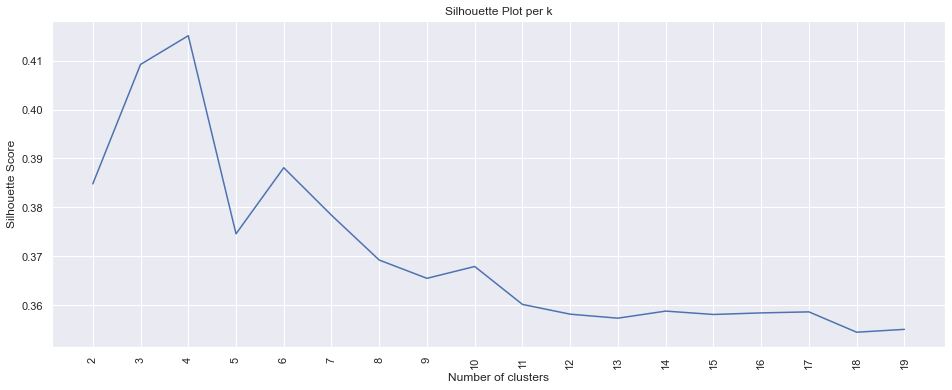

In [92]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clustersINV))
ax1.plot(xx, silhouetteINV)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clustersINV, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Plot per k")

In [93]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersINV = range(2,20) #[2,3,4,5,6,7,8,9]
inertiaINV = []


for f in no_of_clustersINV:
    kmeansINV = KMeans(n_clusters=f, random_state=2)
    kmeansINV = kmeansINV.fit(X_r10)
    vINV = kmeansINV.inertia_
    inertiaINV.append(vINV)
    print("The inertia for", f, "Clusters is:", vINV)

The inertia for 2 Clusters is: 6230.133737399543
The inertia for 3 Clusters is: 3805.999821850714
The inertia for 4 Clusters is: 2630.385656833402
The inertia for 5 Clusters is: 2150.2124953192415
The inertia for 6 Clusters is: 1795.3569475549916
The inertia for 7 Clusters is: 1536.0676782155779
The inertia for 8 Clusters is: 1342.7708465946475
The inertia for 9 Clusters is: 1183.6315379338953
The inertia for 10 Clusters is: 1076.9191909601566
The inertia for 11 Clusters is: 977.5588986147314
The inertia for 12 Clusters is: 890.8941689896636
The inertia for 13 Clusters is: 821.8501525571937
The inertia for 14 Clusters is: 752.3252150643834
The inertia for 15 Clusters is: 702.6925458555365
The inertia for 16 Clusters is: 661.7030589930927
The inertia for 17 Clusters is: 621.3789259484762
The inertia for 18 Clusters is: 590.4862022297779
The inertia for 19 Clusters is: 553.7820054924566


Text(0.5, 1.0, 'Inertia Plot per k')

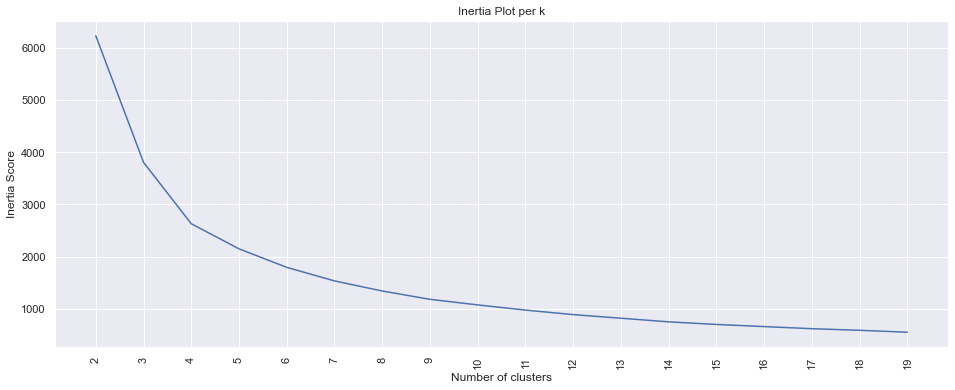

In [94]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clustersINV))
ax1.plot(xx, inertiaINV)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clustersINV, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

## Proviamo il dataset con inv per k=4 che massimizza sia inertia che silhouette

In [95]:
# Running K means on 4 clusters

kmeansINV4 = KMeans(n_clusters=4, random_state=2)
kmeansINV4 = kmeansINV4.fit(X_inv)


clustersINV4=kmeansINV4.labels_

# "predictions" for new data
predictionsINV4 = kmeansINV4.predict(X_inv)

# calculating the Counts of the cluster
uniqueINV4, countsINV4 = np.unique(predictionsINV4, return_counts=True)
countsINV4 = countsINV4.reshape(1,4)

# Creating a datagrame
countscldfINV4 = pd.DataFrame(countsINV4, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countscldfINV4

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,1013,1143,978,1553


Explained variance ratio (first two components): [0.14485666 0.10212356]


<Figure size 1440x1440 with 0 Axes>

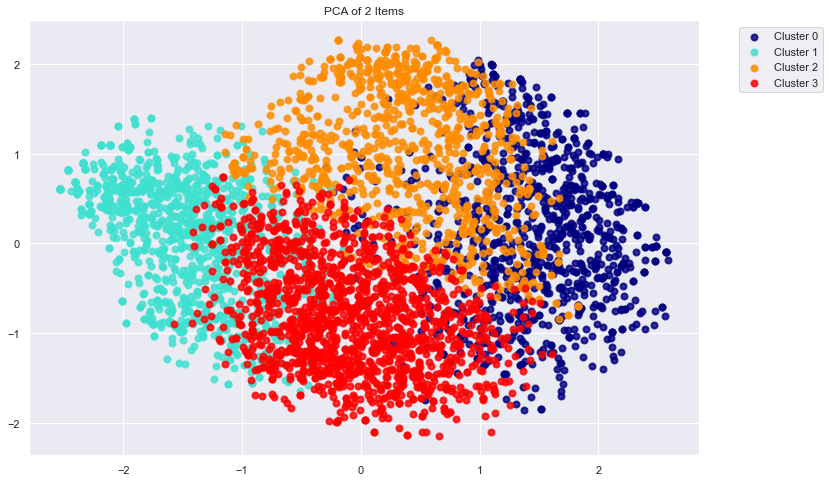

In [96]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X4 = X_inv
y_num4 = predictionsINV4


target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca_inv4 = PCA(n_components=2, random_state = 453)
X_r_inv4 = pca_inv4.fit(X4).transform(X4)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca_inv4.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']#'limegreen','hotpink','olive','saddlebrown','darkgrey']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r_inv4[y_num4 == i, 0], X_r_inv4[y_num4 == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [97]:
pca10 = PCA(n_components=2, random_state = 453)
X_r10 = pca1.fit(X_inv).transform(X_inv)

# Running K means on 5 clusters

kmeans10 = KMeans(n_clusters=5, random_state=2)
kmeans10 = kmeans10.fit(X_r10)


clusters10=kmeans10.labels_

# "predictions" for new data
predictions10 = kmeans10.predict(X_r10)

# calculating the Counts of the cluster
unique10, counts10 = np.unique(predictions10, return_counts=True)
counts10 = counts10.reshape(1,5)

# Creating a datagrame
countscldf10 = pd.DataFrame(counts10, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf10

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,874,905,908,1090,910


In [98]:
from sklearn.metrics import silhouette_score
silhouette_score(X_r10, clusters10)

0.37460269226975773

# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Controllo numero cluster

In [99]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [100]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
silhouette = []


for f in no_of_clusters:
    kmeans1 = KMeans(n_clusters=f, random_state=2)
    kmeans1 = kmeans1.fit(X_r1)
    lab1= kmeans1.labels_
    u = metrics.silhouette_score(X_r1, lab1, metric='euclidean')
    silhouette.append(u)
    print("The silho for :", f, "Clusters is:", u)

The silho for : 2 Clusters is: 0.4318709720760499
The silho for : 3 Clusters is: 0.46564257261890735
The silho for : 4 Clusters is: 0.42345988100176263
The silho for : 5 Clusters is: 0.3999415992837559
The silho for : 6 Clusters is: 0.4142849746347822
The silho for : 7 Clusters is: 0.4040288415577622
The silho for : 8 Clusters is: 0.38967809529885145
The silho for : 9 Clusters is: 0.3692868110542977
The silho for : 10 Clusters is: 0.3765136996681934
The silho for : 11 Clusters is: 0.38781791221186185
The silho for : 12 Clusters is: 0.37568626687895457
The silho for : 13 Clusters is: 0.36299093274954425
The silho for : 14 Clusters is: 0.3694486721953807
The silho for : 15 Clusters is: 0.3759334835914549
The silho for : 16 Clusters is: 0.362037614542241
The silho for : 17 Clusters is: 0.3663648778466083
The silho for : 18 Clusters is: 0.3654585686991885
The silho for : 19 Clusters is: 0.3555928616041557


Text(0.5, 1.0, 'Silhouette Plot per k')

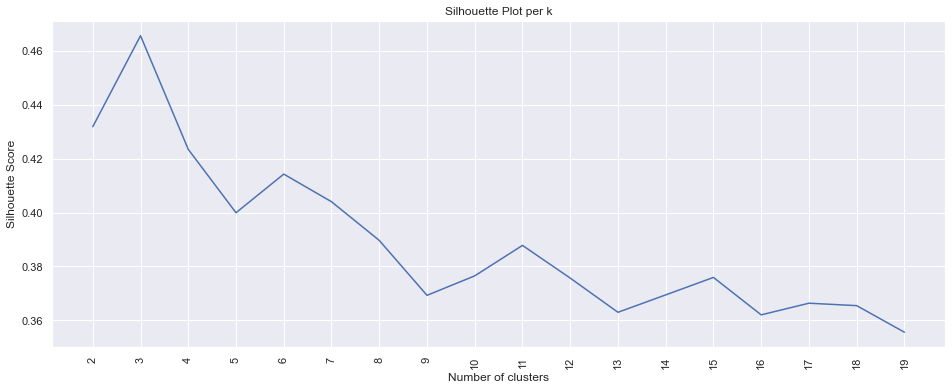

In [101]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, silhouette)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Plot per k")

In [102]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans11 = KMeans(n_clusters=f, random_state=2)
    kmeans11 = kmeans11.fit(X_r1)
    v = kmeans11.inertia_
    inertia.append(v)
    print("The innertia for :", f, "Clusters is:", v)

The innertia for : 2 Clusters is: 4758.254146230978
The innertia for : 3 Clusters is: 2543.469996016879
The innertia for : 4 Clusters is: 1891.9257309757088
The innertia for : 5 Clusters is: 1471.4320117222098
The innertia for : 6 Clusters is: 1243.599861183347
The innertia for : 7 Clusters is: 1041.1265963572448
The innertia for : 8 Clusters is: 905.5874124819712
The innertia for : 9 Clusters is: 801.843270822165
The innertia for : 10 Clusters is: 729.496748888743
The innertia for : 11 Clusters is: 653.0369980989198
The innertia for : 12 Clusters is: 600.8680143996455
The innertia for : 13 Clusters is: 563.3816405594587
The innertia for : 14 Clusters is: 519.9107525689021
The innertia for : 15 Clusters is: 482.71174508723436
The innertia for : 16 Clusters is: 457.7414141433881
The innertia for : 17 Clusters is: 427.53924243718586
The innertia for : 18 Clusters is: 407.98560925885374
The innertia for : 19 Clusters is: 385.4616430559471


Text(0.5, 1.0, 'Inertia Plot per k')

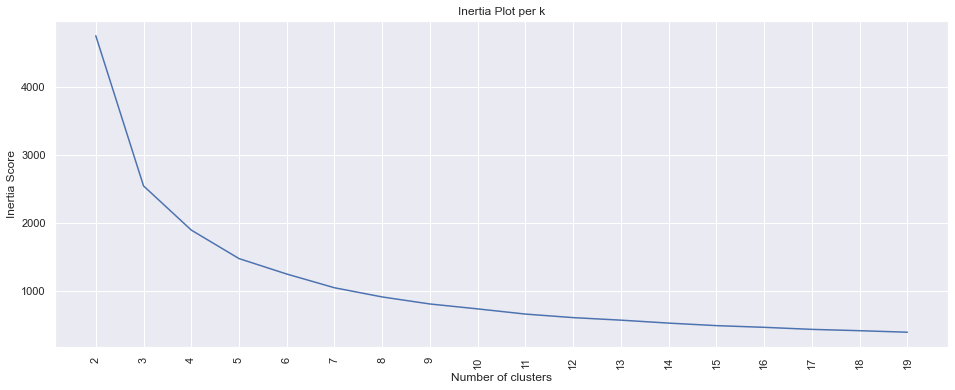

In [103]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

# //////////////////////////////////////////////////////////////////////////////////////////////////

# Cluster solo con inv

In [104]:
DF_inv=DF2[['BI_0a35',
       'BI_35a70', 'BI_70plus', 'EI_0a20', 'EI_20a40', 'EI_40plus', 'MMI_0a5',
       'MMI_5a25', 'MMI_25plus', 'OI_0', 'OI_0a20', 'OI_20plus', 'C_0a3',
       'C_3a35', 'C_35plus']]

In [105]:
DF_inv.head()

,BI_0a35,BI_35a70,BI_70plus,EI_0a20,EI_20a40,EI_40plus,MMI_0a5,MMI_5a25,MMI_25plus,OI_0,OI_0a20,OI_20plus,C_0a3,C_3a35,C_35plus
0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0
2,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
3,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [106]:
XOINV=DF_inv.values

In [107]:
XOINV

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [108]:
pcaOINV = PCA(n_components=2, random_state = 453)
XOINV = pcaOINV.fit(XOINV).transform(XOINV)

In [109]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersOINV = range(2,20) #[2,3,4,5,6,7,8,9]
silhouetteOINV = []


for f in no_of_clustersOINV:
    kmeansOINV = KMeans(n_clusters=f, random_state=2)
    kmeansOINV = kmeansOINV.fit(XOINV)
    labOINV= kmeansOINV.labels_
    uOINV = metrics.silhouette_score(XOINV, labOINV, metric='euclidean')
    silhouetteOINV.append(uOINV)
    print("The silho for :", f, "Clusters is:", uOINV)

The silho for : 2 Clusters is: 0.4700098982247823
The silho for : 3 Clusters is: 0.5148061643669997
The silho for : 4 Clusters is: 0.5428533102758207
The silho for : 5 Clusters is: 0.5445436693806196
The silho for : 6 Clusters is: 0.5543503239828971
The silho for : 7 Clusters is: 0.5659512087624358
The silho for : 8 Clusters is: 0.5963686473653755
The silho for : 9 Clusters is: 0.6116540173735893
The silho for : 10 Clusters is: 0.6254874697346746
The silho for : 11 Clusters is: 0.6241339351561993
The silho for : 12 Clusters is: 0.6491226781516476
The silho for : 13 Clusters is: 0.6854498224880392
The silho for : 14 Clusters is: 0.7035399286581226
The silho for : 15 Clusters is: 0.7095121944431119
The silho for : 16 Clusters is: 0.7354079286656605
The silho for : 17 Clusters is: 0.740960890462814
The silho for : 18 Clusters is: 0.763627436236605
The silho for : 19 Clusters is: 0.7737364627718204


Text(0.5, 1.0, 'Silhouette Plot per k')

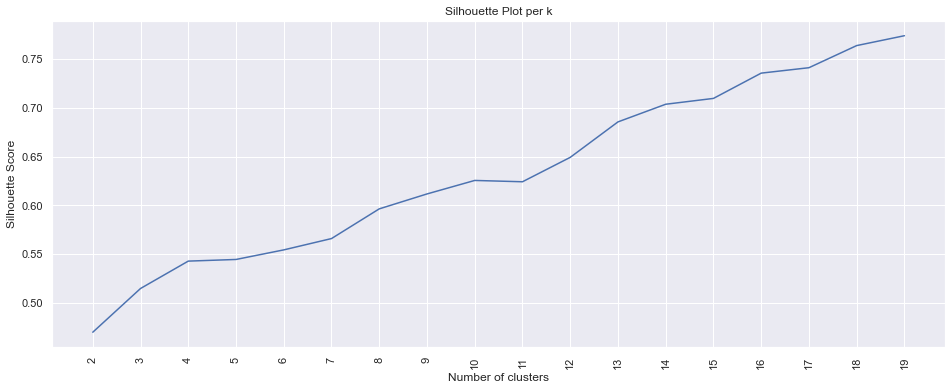

In [110]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xxOINV = np.arange(len(no_of_clustersOINV))
ax1.plot(xxOINV, silhouetteOINV)
ax1.set_xticks(xxOINV)
ax1.set_xticklabels(no_of_clustersOINV, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Plot per k")

In [111]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersOINV = range(2,20) #[2,3,4,5,6,7,8,9]
inertiaOINV = []


for f in no_of_clustersOINV:
    kmeansOINV = KMeans(n_clusters=f, random_state=2)
    kmeansOINV = kmeansOINV.fit(XOINV)
    vOINV = kmeansOINV.inertia_
    inertiaOINV.append(vOINV)
    print("The innertia for :", f, "Clusters is:", vOINV)

The innertia for : 2 Clusters is: 2946.245841352653
The innertia for : 3 Clusters is: 1629.0133632842262
The innertia for : 4 Clusters is: 1016.9099616606821
The innertia for : 5 Clusters is: 767.7580887786723
The innertia for : 6 Clusters is: 597.9774763841637
The innertia for : 7 Clusters is: 487.116357591584
The innertia for : 8 Clusters is: 397.2362809903962
The innertia for : 9 Clusters is: 334.42100856789125
The innertia for : 10 Clusters is: 263.2755950615035
The innertia for : 11 Clusters is: 231.405530181321
The innertia for : 12 Clusters is: 200.00731732981527
The innertia for : 13 Clusters is: 173.78356117389444
The innertia for : 14 Clusters is: 148.8720654922753
The innertia for : 15 Clusters is: 132.185848131688
The innertia for : 16 Clusters is: 114.8036012562468
The innertia for : 17 Clusters is: 95.21255614935303
The innertia for : 18 Clusters is: 84.3493647567912
The innertia for : 19 Clusters is: 72.09238838855885


Text(0.5, 1.0, 'Inertia Plot per k')

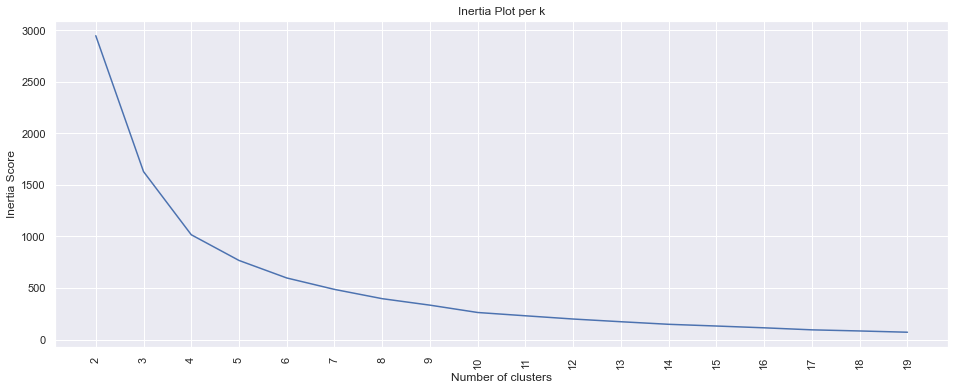

In [112]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clustersOINV))
ax1.plot(xx, inertiaOINV)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clustersOINV, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [113]:
# Running K means on 4 clusters

kmeansOINV = KMeans(n_clusters=4, random_state=2)
kmeansOINV = kmeansOINV.fit(XOINV)


clustersOINV=kmeansOINV.labels_

# "predictions" for new data
predictionsOINV = kmeansOINV.predict(XOINV)

# calculating the Counts of the cluster
uniqueOINV, countsOINV = np.unique(predictionsOINV, return_counts=True)
countsOINV = countsOINV.reshape(1,4)

# Creating a datagrame
countscldfOINV = pd.DataFrame(countsOINV, columns = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])

# display
countscldfOINV

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,851,1340,1616,880


Explained variance ratio (first two components): [0.65636008 0.34363992]


<Figure size 1440x1440 with 0 Axes>

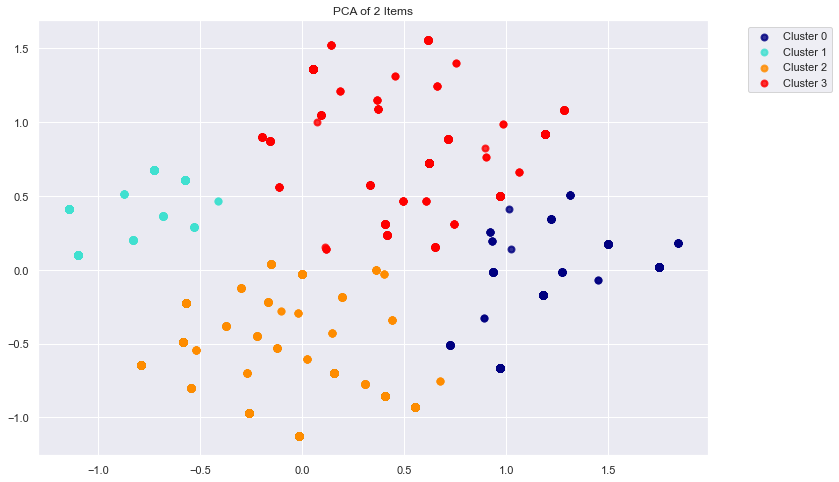

In [114]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = XOINV
y_numOINV = predictionsOINV


target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pcaOINV = PCA(n_components=2, random_state = 453)
XO_inv = pcaOINV.fit(XOINV).transform(XOINV)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pcaOINV.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']#'limegreen','hotpink','olive','saddlebrown','darkgrey']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(XO_inv[y_numOINV == i, 0], XO_inv[y_numOINV == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

# Perchè non ho 4000+ punti?

In [115]:
pcaOinv = PCA(n_components=2, random_state = 453)
XOinv = pcaOinv.fit(XOINV).transform(XOINV)

# Running K means on 5 clusters

kmeansOINV = KMeans(n_clusters=4, random_state=2)
kmeansOINV = kmeansOINV.fit(XOinv)


clustersOINV=kmeansOINV.labels_

# "predictions" for new data
predictionsOINV = kmeansOINV.predict(XOinv)

# calculating the Counts of the cluster
uniqueOINV, countsOINV = np.unique(predictionsOINV, return_counts=True)
countsOINV = countsOINV.reshape(1,4)

# Creating a datagrame
countscldfOINV = pd.DataFrame(countsOINV, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countscldfOINV

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,851,1340,1616,880


In [116]:
from sklearn.metrics import silhouette_score
silhouette_score(XOinv, clustersOINV)

0.5428533095775521

# Provare a vedere cosa viene con 3 cluster
### Con dataset senza inv

In [117]:
# Running K means on 3 clusters

kmeans3 = KMeans(n_clusters=3, random_state=2)
kmeans3 = kmeans3.fit(X_train)


clusters3=kmeans3.labels_

# "predictions" for new data
predictions3 = kmeans3.predict(X_train)

# calculating the Counts of the cluster
unique3, counts3 = np.unique(predictions3, return_counts=True)
counts3 = counts3.reshape(1,3)

# Creating a datagrame
countscldf3 = pd.DataFrame(counts3, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf3

,Cluster 0,Cluster 1,Cluster 2
0,1658,2036,993


<Figure size 1440x1440 with 0 Axes>

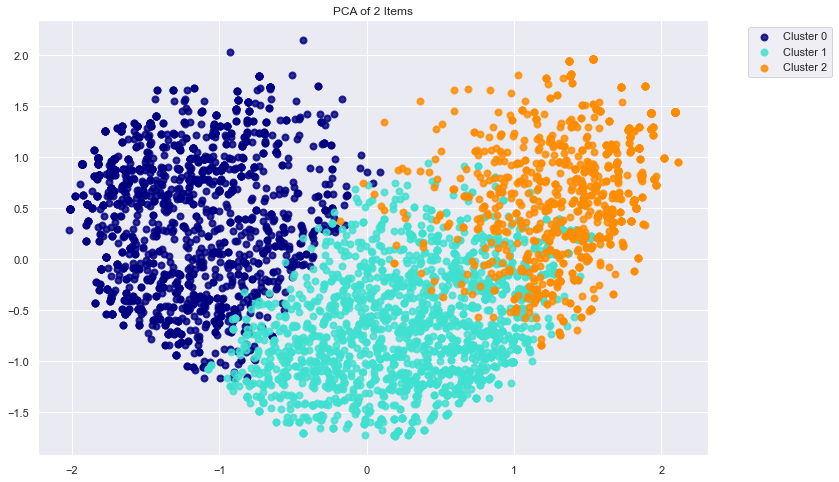

In [118]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X3 = X_train
y_num3 = predictions3


target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca3 = PCA(n_components=2, random_state = 453)
X_r3 = pca.fit(X3).transform(X3)


# Percentage of variance explained for each components
#print('Explained variance ratio (first two components): %s' % str(pca3.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']#'limegreen','hotpink','olive','saddlebrown','darkgrey']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r3[y_num3 == i, 0], X_r3[y_num3 == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [119]:
pca3 = PCA(n_components=2, random_state = 453)
X_r3 = pca3.fit(X3).transform(X3)

# Running K means on 5 clusters

kmeans3 = KMeans(n_clusters=3, random_state=2)
kmeans3 = kmeans3.fit(X_r3)


clusters3=kmeans3.labels_

# "predictions" for new data
predictions3 = kmeans3.predict(X_r3)

# calculating the Counts of the cluster
unique3, counts3 = np.unique(predictions3, return_counts=True)
counts3 = counts3.reshape(1,3)

# Creating a datagrame
countscldf3 = pd.DataFrame(counts3, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf3

,Cluster 0,Cluster 1,Cluster 2
0,1620,1298,1769


In [120]:
silhouette_score(X_r3, clusters3)

0.46564257261890735

# Provare a vedere cosa viene con 4 cluster

In [121]:
# Running K means on 4 clusters

kmeans4 = KMeans(n_clusters=4, random_state=2)
kmeans4 = kmeans4.fit(X_train)


clusters4=kmeans4.labels_

# "predictions" for new data
predictions4 = kmeans4.predict(X_train)

# calculating the Counts of the cluster
unique4, counts4 = np.unique(predictions4, return_counts=True)
counts4 = counts4.reshape(1,4)

# Creating a datagrame
countscldf4 = pd.DataFrame(counts4, columns = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])

# display
countscldf4

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,1705,943,1049,990


<Figure size 1440x1440 with 0 Axes>

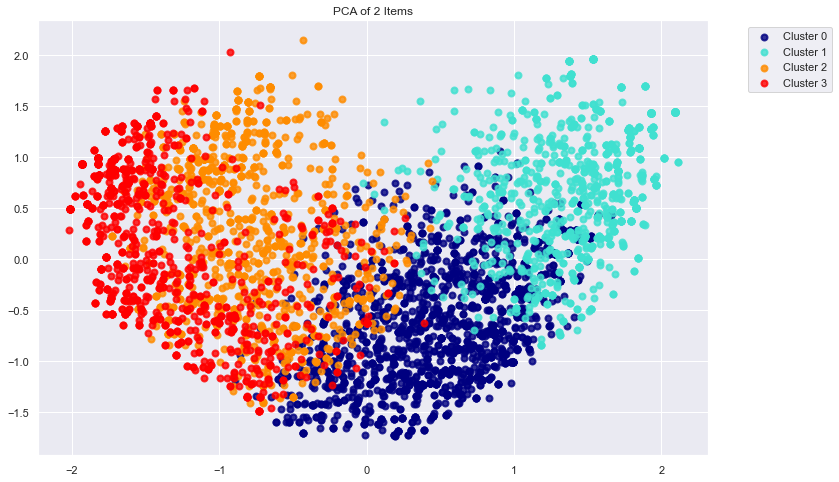

In [122]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X4= X_train
y_num4 = predictions4


target_names = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"]

pca4 = PCA(n_components=2, random_state = 453)
X_r4 = pca.fit(X4).transform(X4)


# Percentage of variance explained for each components
#print('Explained variance ratio (first two components): %s' % str(pca3.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']#'limegreen','hotpink','olive','saddlebrown','darkgrey']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
    plt.scatter(X_r4[y_num4 == i, 0], X_r4[y_num4 == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [123]:
pca4 = PCA(n_components=2, random_state = 453)
X_r4 = pca3.fit(X4).transform(X4)

# Running K means on 5 clusters

kmeans4 = KMeans(n_clusters=4, random_state=2)
kmeans4 = kmeans4.fit(X_r4)


clusters4=kmeans4.labels_

# "predictions" for new data
predictions4 = kmeans4.predict(X_r4)

# calculating the Counts of the cluster
unique4, counts4 = np.unique(predictions4, return_counts=True)
counts4 = counts4.reshape(1,4)

# Creating a datagrame
countscldf4 = pd.DataFrame(counts4, columns = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])

# display
countscldf4

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,1460,1104,1092,1031


In [124]:
silhouette_score(X_r4, clusters4)

0.42345988100176263

## Gathering the two data sets

In [125]:
X = DF.values
DF.head()

,Age_00a35,Age_35a60,Age_60a75,Age_75plus,RP_000a030,RP_030a055,RP_055a070,RP_070plus,PR_000a005,PR_005a008,PR_008a020,PR_020plus,CPI_00a02,CPI_02a06,CPI_06plus,CKE_000a050,CKE_050a075,CKE_075plus,AuM_000a035,AuM_035a085,AuM_085a200,AuM_200plus,IN_000a030,IN_030a040,IN_040plus,LTCN_000a025,LTCN_025a050,LTCN_050a075,LTCN_075plus,PN_000a030,PN_030a065,PN_065plus,PEN_000a040,PEN_040a070,PEN_070plus,II_000a040,II_040a065,II_065plus,BI_0a35,BI_35a70,BI_70plus,EI_0a20,EI_20a40,EI_40plus,MMI_0a5,MMI_5a25,MMI_25plus,OI_0,OI_0a20,OI_20plus,C_0a3,C_3a35,C_35plus
0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [126]:
X_inv = DF_inv.values
DF_inv.head()

,BI_0a35,BI_35a70,BI_70plus,EI_0a20,EI_20a40,EI_40plus,MMI_0a5,MMI_5a25,MMI_25plus,OI_0,OI_0a20,OI_20plus,C_0a3,C_3a35,C_35plus
0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0
2,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
3,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [127]:
# Best clusterization for DF

no_of_clusters = range(2,11)
silhouette = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    lab = kmeans.labels_
    u = silhouette_score(X, lab, metric='euclidean')
    silhouette.append(u)
    print("The silho for :", f, "Clusters is:", u)

The silho for : 2 Clusters is: 0.104586040903735
The silho for : 3 Clusters is: 0.09486965401815904
The silho for : 4 Clusters is: 0.0956278833940235
The silho for : 5 Clusters is: 0.0854850517700224
The silho for : 6 Clusters is: 0.08488855522526588
The silho for : 7 Clusters is: 0.08421801273782162
The silho for : 8 Clusters is: 0.08609654867283925
The silho for : 9 Clusters is: 0.08424230383776331
The silho for : 10 Clusters is: 0.08245074465436453


In [128]:
# Best clusterization for DF_inv

no_of_clustersINV = range(2,11)
silhouetteINV = []

for f in no_of_clustersINV:
    kmeansINV = KMeans(n_clusters=f, random_state=2)
    kmeansINV = kmeansINV.fit(X_inv)
    labINV= kmeansINV.labels_
    uINV = silhouette_score(X_inv, labINV, metric='euclidean')
    silhouetteINV.append(uINV)
    print("The silho for :", f, "Clusters is:", uINV)

The silho for : 2 Clusters is: 0.2734016697149403
The silho for : 3 Clusters is: 0.2720352371886303
The silho for : 4 Clusters is: 0.2885269555620117
The silho for : 5 Clusters is: 0.34010828517522534
The silho for : 6 Clusters is: 0.3632608830454912
The silho for : 7 Clusters is: 0.3823253738257746
The silho for : 8 Clusters is: 0.4152788098558488
The silho for : 9 Clusters is: 0.4168957577592399
The silho for : 10 Clusters is: 0.46849929598425877


In [129]:
# best combination is 4 clusters for DF and 10 for DF_inv

kmeans4 = KMeans(n_clusters=4, random_state=2)
kmeans4 = kmeans4.fit(X)
clusters4=kmeans4.labels_
# "predictions" for new data
predictions4 = kmeans4.predict(X)
# calculating the Counts of the cluster
unique4, counts4 = np.unique(predictions4, return_counts=True)
counts4 = counts4.reshape(1,4)

kmeans10 = KMeans(n_clusters=10, random_state=2)
kmeans10 = kmeans10.fit(X_inv)
clusters10=kmeans10.labels_
# "predictions" for new data
predictions10 = kmeans10.predict(X_inv)
# calculating the Counts of the cluster
unique10, counts10 = np.unique(predictions10, return_counts=True)
counts10 = counts10.reshape(1,10)

In [130]:
# all pertinent data in the same df
DF_gather = pd.DataFrame()
DF_gather['ClientID'] = df['ClientID']
DF_gather['needs'] = clusters4
DF_gather['portfolio'] = clusters10
DF_gather.head()

,ClientID,needs,portfolio
0,Client1,1,5
1,Client19,3,1
2,Client652,3,5
3,Client671,0,6
4,Client762,0,1


In [145]:
tab = DF_gather.groupby(['needs', 'portfolio']).count().unstack()
tab

ClientID                                             
portfolio        0    1    2    3    4    5    6    7    8    9
needs                                                          
0               56  156  121  193   57   62  153  138   47   30
1               79  132   58   19  268   65   37   23  111  351
2               26   86  115   62  312   35   47   26   92  177
3              167  303   80  201  101  207  132  167   84  111

In [149]:
test = df1[['BondInvestments', 'PensionNeed']]
test.sort_values(by=['BondInvestments', 'PensionNeed'], inplace=True)
test.head()

<ipython-input-149-d83e7ce4e5ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by=['BondInvestments', 'PensionNeed'], inplace=True)


,BondInvestments,PensionNeed
1930,0.0,0.022801
3492,0.0,0.026237
4365,0.0,0.028485
3936,0.0,0.035438
3682,0.0,0.036843


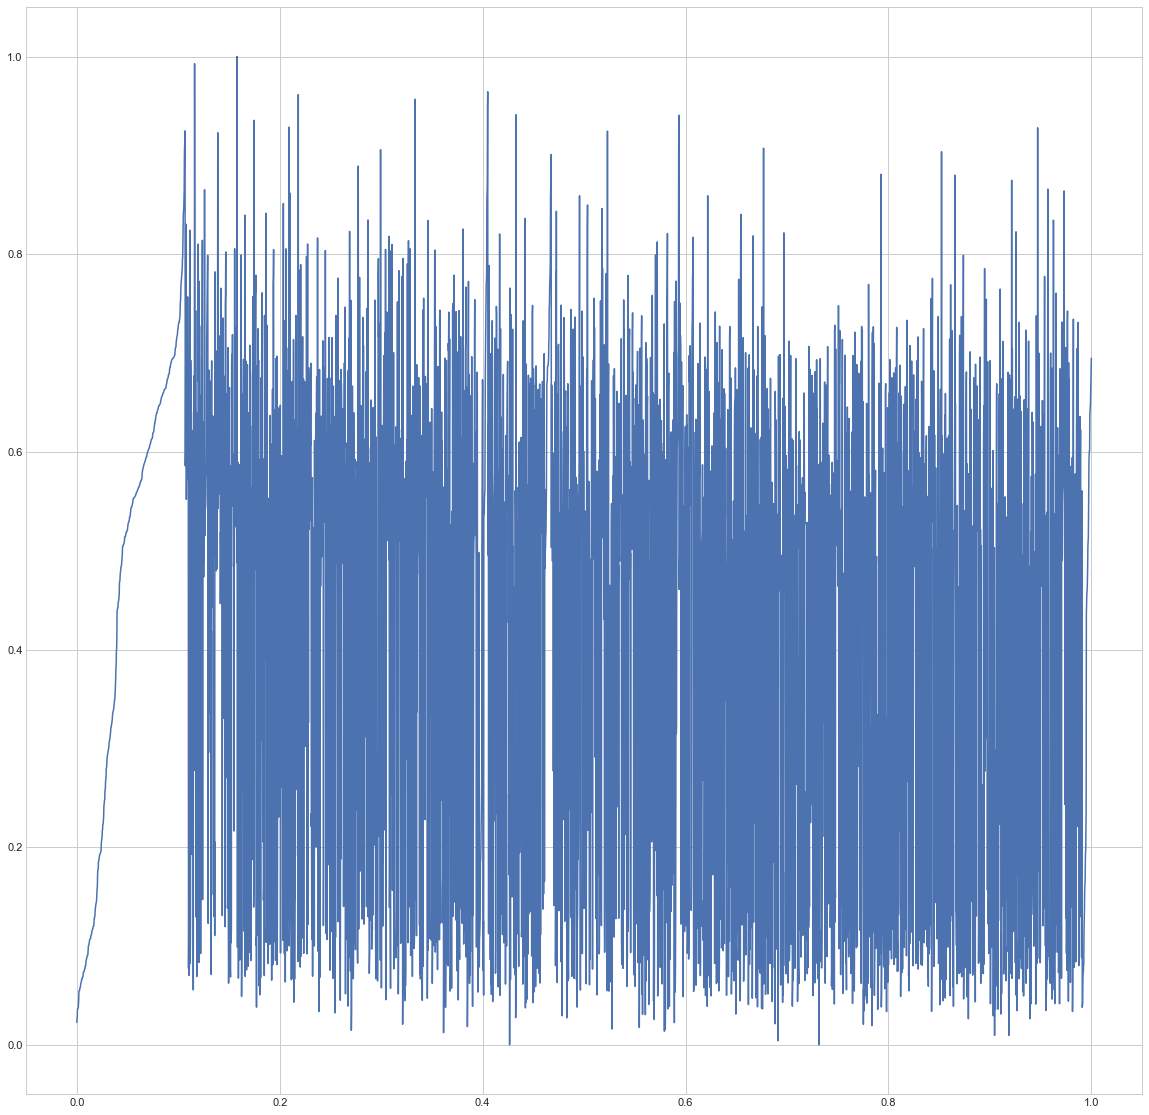

In [159]:
bond = test['BondInvestments']
pension = test['PensionNeed']

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 1, 4687)
ax.plot(x, pension);

In [ ]:
# identificare i clienti che pur avendo ClientKnowledge, RiskPropension e attributi simili alti (rispetto agli altri) non compiano investimenti "a rischio" ma
# abbiano troppi bond. Vogliamo segnalare questi alla banca.

In [ ]:
# pca sul 1o DF, pca sul DF inv, riattacarci i clientID per capire le caratteristiche comuni, infine valutare i mismatch

In [ ]:
# TODO: il csv creato da dare a Davide manca delle colonne delle categoriche degli investimenti, aggiungerle e rimandarglielo
DF2.to_csv('df-inv.csv')

In [ ]:
# TODO: ridurre il numero di cluster degli investimenti tramite pca (variando i componenti) o aumentare il numero di cluster dell'altro, stesso modo.